# Road Segmentation Project
#### CS433 ML - Project 2
#### Team: OGPteam2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [2]:
%cd drive/MyDrive/ml-project-2-ogpteam2/



/content/drive/.shortcut-targets-by-id/1Gl--elA2yI5JHne6d00NJiWZ2VMJHQZc/ml-project-2-ogpteam2


In [47]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
import tensorflow.python.platform
import tensorflow as tf
from tensorflow import keras
from data_loading import *
from data_handling import *
from save_output import *
from data_postprocessing import *
from sklearn.model_selection import train_test_split
from metrics import *
from loss_functions import *
from Image_augmentation import image_augmentation
from model import Unet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from skimage.transform import resize
#from tf.keras.optimizers import SGD, RMSprop
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Loading

In [ ]:
# Load data and labels (images and groundtruth)
data_dir = 'Data/training/'
train_data_aug_filename = data_dir + 'images_aug/'
train_labels_aug_filename = data_dir + 'groundtruth_aug/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/' 

TRAINING_SIZE = 100 # number of images to be used
LOAD_AUGMENTED = True

# TODO add asarray() in extract_data()

# Extract it into numpy arrays.
train_data = extract_data(train_data_filename, train_data_aug_filename, TRAINING_SIZE, LOAD_AUGMENTED)
train_labels = extract_labels(train_labels_filename, train_labels_aug_filename, TRAINING_SIZE, LOAD_AUGMENTED)

Streaming output truncated to the last 5000 lines.
Loading Data/training/images_aug/satImage_005_0_0.png
Loading Data/training/images_aug/satImage_005_0_1.png
Loading Data/training/images_aug/satImage_005_0_2.png
Loading Data/training/images_aug/satImage_005_2_0.png
Loading Data/training/images_aug/satImage_005_2_1.png
Loading Data/training/images_aug/satImage_005_2_10.png
Loading Data/training/images_aug/satImage_005_2_11.png
Loading Data/training/images_aug/satImage_005_2_12.png
Loading Data/training/images_aug/satImage_005_2_13.png
Loading Data/training/images_aug/satImage_005_2_14.png
Loading Data/training/images_aug/satImage_005_2_2.png
Loading Data/training/images_aug/satImage_005_2_3.png
Loading Data/training/images_aug/satImage_005_2_4.png
Loading Data/training/images_aug/satImage_005_2_5.png
Loading Data/training/images_aug/satImage_005_2_6.png
Loading Data/training/images_aug/satImage_005_2_7.png
Loading Data/training/images_aug/satImage_005_2_8.png
Loading Data/training/imag

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(2340, 400, 400, 3)
(260, 400, 400, 3)


## Data Exploration

In [ ]:
c0 = 0  # bgrd
c1 = 0  # road
index_of_0s = []
index_of_1s = []
for i in range(len(train_labels)):
    if train_labels[i][0] == 1:
        c0 = c0 + 1
        index_of_0s.append(i)
    else:
        c1 = c1 + 1
        index_of_0s.append(i)
print('Number of data points per class: c0 = ' + str(c0) + ' c1 = ' + str(c1))

Number of data points per class: c0 = 466 c1 = 159


We have an imbalanced dataset, so we consider both under-sampling and over-sampling

In [ ]:
new_train_data, new_train_labels = oversample(train_data, train_labels, index_of_1s, index_of_0s)


In [ ]:
c0 = 0  # bgrd
c1 = 0  # road
for i in range(len(new_train_labels)):
    if new_train_labels[i][0] == 1:
        c0 = c0 + 1
    else:
        c1 = c1 + 1
print('Number of data points per class: c0 = ' + str(c0) + ' c1 = ' + str(c1))

Number of data points per class: c0 = 466 c1 = 466


In [ ]:
train_labels.shape

(625, 2)

## Image Augmentation

In [ ]:
data_dir = 'Data/training/'
train_data_aug_filename = data_dir + 'images_aug/'
train_labels_aug_filename = data_dir + 'groundtruth_aug/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/' 
num_images = 100
horizontal_vertical_flip = True
rotation = True
brightness = False
zoom = False
shift = True
#num_aug_rotation = 1
#num_aug_flip = 0
#num_aug_zoom_brightness = 0
#num_aug_shift = 1
num_aug_rotation = 15
num_aug_flip = 3
num_aug_zoom_brightness = 0
num_aug_shift = 7


image_augmentation(train_data_filename,
                   train_labels_filename,
                   train_data_aug_filename,
                   train_labels_aug_filename,
                   num_images,
                   num_aug_flip,
                   num_aug_rotation,
                   num_aug_zoom_brightness,
                   num_aug_shift,
                   horizontal_vertical_flip,
                   rotation,
                   brightness,
                   zoom,
                   shift)

Loading Data/training/images/satImage_001.png
Loading Data/training/images/satImage_002.png
Loading Data/training/images/satImage_003.png
Loading Data/training/images/satImage_004.png
Loading Data/training/images/satImage_005.png
Loading Data/training/images/satImage_006.png
Loading Data/training/images/satImage_007.png
Loading Data/training/images/satImage_008.png
Loading Data/training/images/satImage_009.png
Loading Data/training/images/satImage_010.png
Loading Data/training/images/satImage_011.png
Loading Data/training/images/satImage_012.png
Loading Data/training/images/satImage_013.png
Loading Data/training/images/satImage_014.png
Loading Data/training/images/satImage_015.png
Loading Data/training/images/satImage_016.png
Loading Data/training/images/satImage_017.png
Loading Data/training/images/satImage_018.png
Loading Data/training/images/satImage_019.png
Loading Data/training/images/satImage_020.png
Loading Data/training/images/satImage_021.png
Loading Data/training/images/satIm

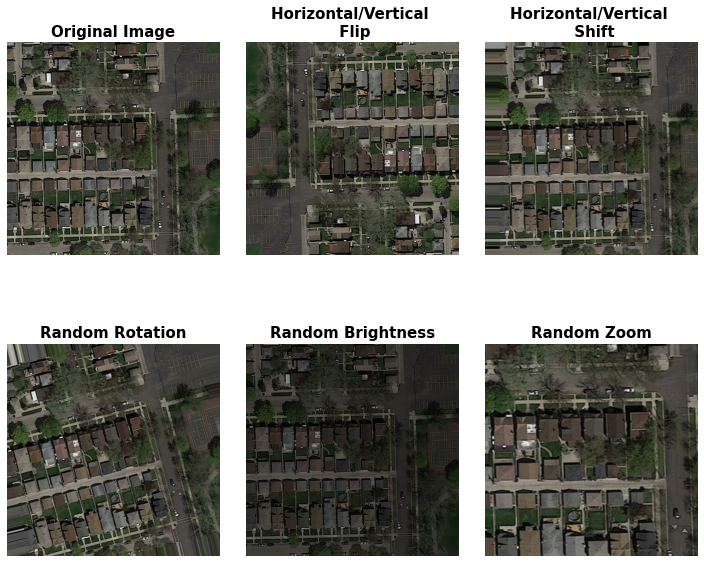

In [ ]:
# code to save picture of data augmentation examples (for report)
# seed definition
seed = 647
# load the image
img = load_img(train_data_filename + "satImage_005.png")
mask = load_img(train_labels_filename + "satImage_005.png")
# convert to numpy array
data = img_to_array(img)
mask_data = img_to_array(mask)
# expand dimension to one sample
samples_img = np.expand_dims(data, 0)
samples_mask = np.expand_dims(mask_data, 0)

fig, ax = plt.subplots(2,3, figsize=(10,10))
fig.subplots_adjust(hspace=0.0001, wspace=0.4)

ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,0].set_title("Original Image", fontweight="bold", size=15)

# HORIZONTAL/VERTICAL FLIP
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen_mask = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate batch of images
batch = it.next()
batch_mask = it_mask.next()
# convert to unsigned integers for viewing
image = batch[0].astype('uint8')
mask_image = batch_mask[0].astype('uint8')
# plot raw pixel data
ax[0,1].imshow(image)
ax[0,1].axis('off')
ax[0,1].set_title("Horizontal/Vertical \n Flip", fontweight="bold", size=15)

# HORIZONTAL/VERTICAL SHIFT
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
datagen_mask = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate batch of images
batch = it.next()
batch_mask = it_mask.next()
# convert to unsigned integers for viewing
image = batch[0].astype('uint8')
mask_image = batch_mask[0].astype('uint8')
# plot raw pixel data
ax[0,2].imshow(image)
ax[0,2].axis('off')
ax[0,2].set_title("Horizontal/Vertical \n Shift", fontweight="bold", size=15)

# ROTATION
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
datagen_mask = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate batch of images
batch = it.next()
batch_mask = it_mask.next()
# convert to unsigned integers for viewing
image = batch[0].astype('uint8')
mask_image = batch_mask[0].astype('uint8')
# plot raw pixel data
ax[1,0].imshow(image)
ax[1,0].axis('off')
ax[1,0].set_title("Random Rotation", fontweight="bold", size=15)

# BRIGHTNESS
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
datagen_mask = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate batch of images
batch = it.next()
batch_mask = it_mask.next()
# convert to unsigned integers for viewing
image = batch[0].astype('uint8')
mask_image = batch_mask[0].astype('uint8')
# plot raw pixel data
ax[1,1].imshow(image)
ax[1,1].axis('off')
ax[1,1].set_title("Random Brightness", fontweight="bold", size=15)

# ZOOM
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
datagen_mask = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate batch of images
batch = it.next()
batch_mask = it_mask.next()
# convert to unsigned integers for viewing
image = batch[0].astype('uint8')
mask_image = batch_mask[0].astype('uint8')
# plot raw pixel data
ax[1,2].imshow(image)
ax[1,2].axis('off')
ax[1,2].set_title("Random Zoom", fontweight="bold", size=15)


# show the figure
plt.tight_layout()
plt.show()
fig.savefig("Report/augmentation_example.png", bbox_inches='tight')

## Training

### Image Normalization
Normalize images on scale [0, 1] (previously were [0, 255]) during training. This is to prevent filling the entire RAM, which happens if the normalization is done while loading (because images would be converted from uint8 to float32 --> x4 more memory). 

In [ ]:
# create normalization generator with scaling factor
norm_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.1)

# tranform it into a binary classification problem
#c_train_labels = ((train_labels / 255) > 0.5).astype("uint8") * 255

# prepare iterators with initial data (for training and testing)
train_iterator = norm_datagen.flow(train_data, train_labels, batch_size=8, subset="training")
validation_iterator = norm_datagen.flow(train_data, train_labels, batch_size=8, subset="validation")
#test_iterator = norm_datagen.flow(test_data, test_labels, batch_size=8)

### Model Initialization

In [14]:
image_shape = (400, 400, 3)
input = Input(image_shape)
n_classes = 1
n_filters = 8 #32

# create unet object
unet_object = Unet(n_classes, n_filters)

# apply keras.Input object to model and obtain outputs
output = unet_object.forward(input)

# groups layers into a model object with training and inference features
model = Model(inputs=[input], outputs=[output])


# compile model for training
"""
things to try
-------------
optimizer (https://www.kaggle.com/c/carvana-image-masking-challenge/discussion/38505):
  - Adam (optimizer=tf.keras.optimizer.Adam(learning_rate=1e-3))
  - SGD (tf.keras.optimizers.SGD(learning_rate=0.1)
  - RMSProp (tf.keras.optimizers.RMSprop(learning_rate=0.1)
loss (add with no parentesis):
  - Focal Loss (FocalLoss)
  - IoU Loss (IoULoss)
metrics (https://neptune.ai/blog/implementing-the-macro-f1-score-in-keras)
  - f1 score
"""
#tf.keras.losses.SparseCategoricalCrossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=[keras.metrics.Precision(), keras.metrics.Recall(), "accuracy"])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 400, 400, 8)  224         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 400, 400, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
# VERSION WITH NORMALIZATION
callbacks = [
    EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.00001, verbose=1),
    ModelCheckpoint('Weights/model-unet-MSL-black-4features.h5', verbose=1, save_best_only=True, save_weights_only=True)
]
#tf.config.run_functions_eagerly(False)
# trains the model for a fixed number of epochs
model.fit(train_iterator,
          validation_data=validation_iterator,
          steps_per_epoch=len(train_iterator),
          validation_steps=len(validation_iterator),
          epochs=10,
          callbacks=callbacks,
          verbose=1)

Epoch 1/10
264/264 [==============================] - ETA: 0s - loss: 4.4910 - precision: 0.3273 - recall: 0.9146 - accuracy: 0.4125
Epoch 00001: val_loss improved from inf to 4.86013, saving model to Weights/model-unet-MSL-black-4features.h5
264/264 [==============================] - 62s 183ms/step - loss: 4.4910 - precision: 0.3273 - recall: 0.9146 - accuracy: 0.4125 - val_loss: 4.8601 - val_precision: 0.1157 - val_recall: 0.0637 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 2/10
264/264 [==============================] - ETA: 0s - loss: 4.3545 - precision: 0.4475 - recall: 0.9552 - accuracy: 0.5570
Epoch 00002: val_loss improved from 4.86013 to 4.26283, saving model to Weights/model-unet-MSL-black-4features.h5
264/264 [==============================] - 46s 175ms/step - loss: 4.3545 - precision: 0.4475 - recall: 0.9552 - accuracy: 0.5570 - val_loss: 4.2628 - val_precision: 0.3397 - val_recall: 0.9189 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 3/10
264/264 [==============================] 

In [ ]:
callbacks = [
    EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.00001, verbose=1),
    ModelCheckpoint('/Weights/model-unet-focal.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

# trains the model for a fixed number of epochs
model.fit(train_data,
          train_labels,
          batch_size=8,
          epochs=10,
          callbacks=callbacks,
          verbose=1,
          validation_split=0.1)

In [ ]:
# evalue model using accuracy score
#model.load_weights('model-unet-IoU.h5')
loss, precision, recall, accuracy = model.evaluate(test_iterator, verbose=0)
f1 = (2 * precision * recall) / (precision + recall)
(accuracy, f1)


[Errno 2] No such file or directory: 'Weights/'
/content/drive/.shortcut-targets-by-id/1Gl--elA2yI5JHne6d00NJiWZ2VMJHQZc/ml-project-2-ogpteam2/Weights


(0.7223678827285767, 0.8241205979697688)

In [ ]:
def plot_sample(X, y, preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = np.random.randint(0, len(preds))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix])
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('original')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('mask')

    ax[2].imshow(preds[ix].squeeze())
    #if has_mask:
    #    ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('mask predicted')

In [ ]:
plot_sample(test_data, test_labels, pred_test)


In [ ]:
plot_sample(train_data, train_labels, pred_test)

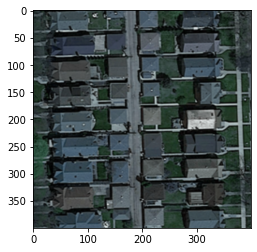

In [ ]:
plt.imshow(train_data[])

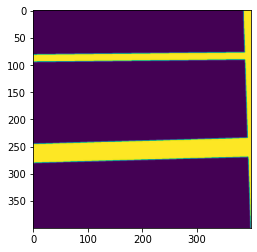

In [ ]:
plt.imshow(train_labels[800].squeeze())

## Predictions on Test Set

### Load and predict

In [51]:
## Load and predict testset data
testset_data_filename = 'Data/test_set_images/'

TEST_SIZE = 50 # number of images to be used
new_size = 608

# Extract it into numpy arrays.
testset_data = extract_test_data(testset_data_filename, TEST_SIZE)

model.load_weights('Weights/model-unet-MSL-black-8features.h5') 

pred_testset = model_predict(model, testset_data, new_size)

Loading Data/test_set_images/test_1/test_1.png
Loading Data/test_set_images/test_2/test_2.png
Loading Data/test_set_images/test_3/test_3.png
Loading Data/test_set_images/test_4/test_4.png
Loading Data/test_set_images/test_5/test_5.png
Loading Data/test_set_images/test_6/test_6.png
Loading Data/test_set_images/test_7/test_7.png
Loading Data/test_set_images/test_8/test_8.png
Loading Data/test_set_images/test_9/test_9.png
Loading Data/test_set_images/test_10/test_10.png
Loading Data/test_set_images/test_11/test_11.png
Loading Data/test_set_images/test_12/test_12.png
Loading Data/test_set_images/test_13/test_13.png
Loading Data/test_set_images/test_14/test_14.png
Loading Data/test_set_images/test_15/test_15.png
Loading Data/test_set_images/test_16/test_16.png
Loading Data/test_set_images/test_17/test_17.png
Loading Data/test_set_images/test_18/test_18.png
Loading Data/test_set_images/test_19/test_19.png
Loading Data/test_set_images/test_20/test_20.png
Loading Data/test_set_images/test_21/t

100%|██████████| 50/50 [00:08<00:00,  6.24it/s]


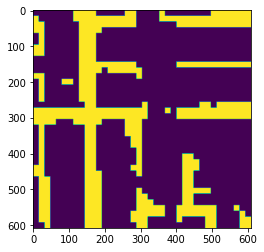

In [52]:
id = 21
plt.imshow(pred_testset[id].squeeze())
im_pre = pred_testset[id]

### Post Processing

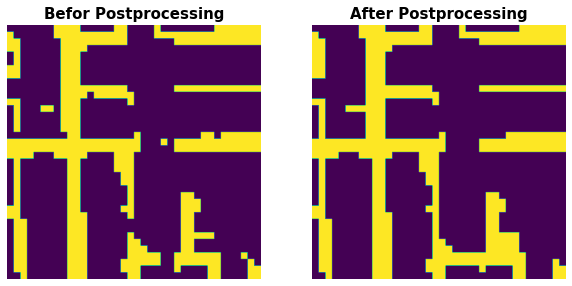

In [53]:
# plot
fig, ax = plt.subplots(1,2, figsize=(10, 10))
id = 21

ax[0].imshow(im_pre.squeeze())
ax[0].axis('off')
ax[0].set_title("Befor Postprocessing", fontweight="bold", size=15)

pp_pred_testset = process_road_holes(pred_testset)



ax[1].imshow(pp_pred_testset[id].squeeze())
ax[1].axis('off')
ax[1].set_title("After Postprocessing", fontweight="bold", size=15)


#plt.show()
fig.savefig("Report/pp_example.png", bbox_inches='tight')

### Generate output file

In [ ]:
## SAVE OUTPUT

masks_to_submission_outer('Output/submission_ppfinal_MSL_black_8features.csv', pp_pred_testset)

50
